In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns

In [3]:
traj_dir='//Users/mingyu/analysis/MAA_POX_June_rep2//'
traj = pt.iterload('*strip.nc', '*strip.parm7',stride=1)
pt.superpose(traj, ref=0)
rmsf_list=pt.rmsf(traj[int(len(traj)*0.75):] ,mask='byres')   
print (len(rmsf_list))
Dimer_1=rmsf_list[1:554]
print(len(Dimer_1))
print (Dimer_1)
Dimer_2= rmsf_list[554:]
print(len(Dimer_2))
print (Dimer_2)
rmsf_stack=np.vstack((Dimer_1.T[1],Dimer_2.T[1]))
print (rmsf_stack)

1107
553
[[2.00000000e+00 1.70171347e+00]
 [3.00000000e+00 1.59594177e+00]
 [4.00000000e+00 9.23422181e-01]
 ...
 [5.52000000e+02 1.20378356e+00]
 [5.53000000e+02 8.74710232e-01]
 [5.54000000e+02 5.41430597e-01]]
553
[[5.55000000e+02 1.42324383e+00]
 [5.56000000e+02 1.25863744e+00]
 [5.57000000e+02 8.73232827e-01]
 ...
 [1.10500000e+03 1.53488390e+00]
 [1.10600000e+03 9.35540044e-01]
 [1.10700000e+03 5.84901912e-01]]
[[1.70171347 1.59594177 0.92342218 ... 1.20378356 0.87471023 0.5414306 ]
 [1.42324383 1.25863744 0.87323283 ... 1.5348839  0.93554004 0.58490191]]


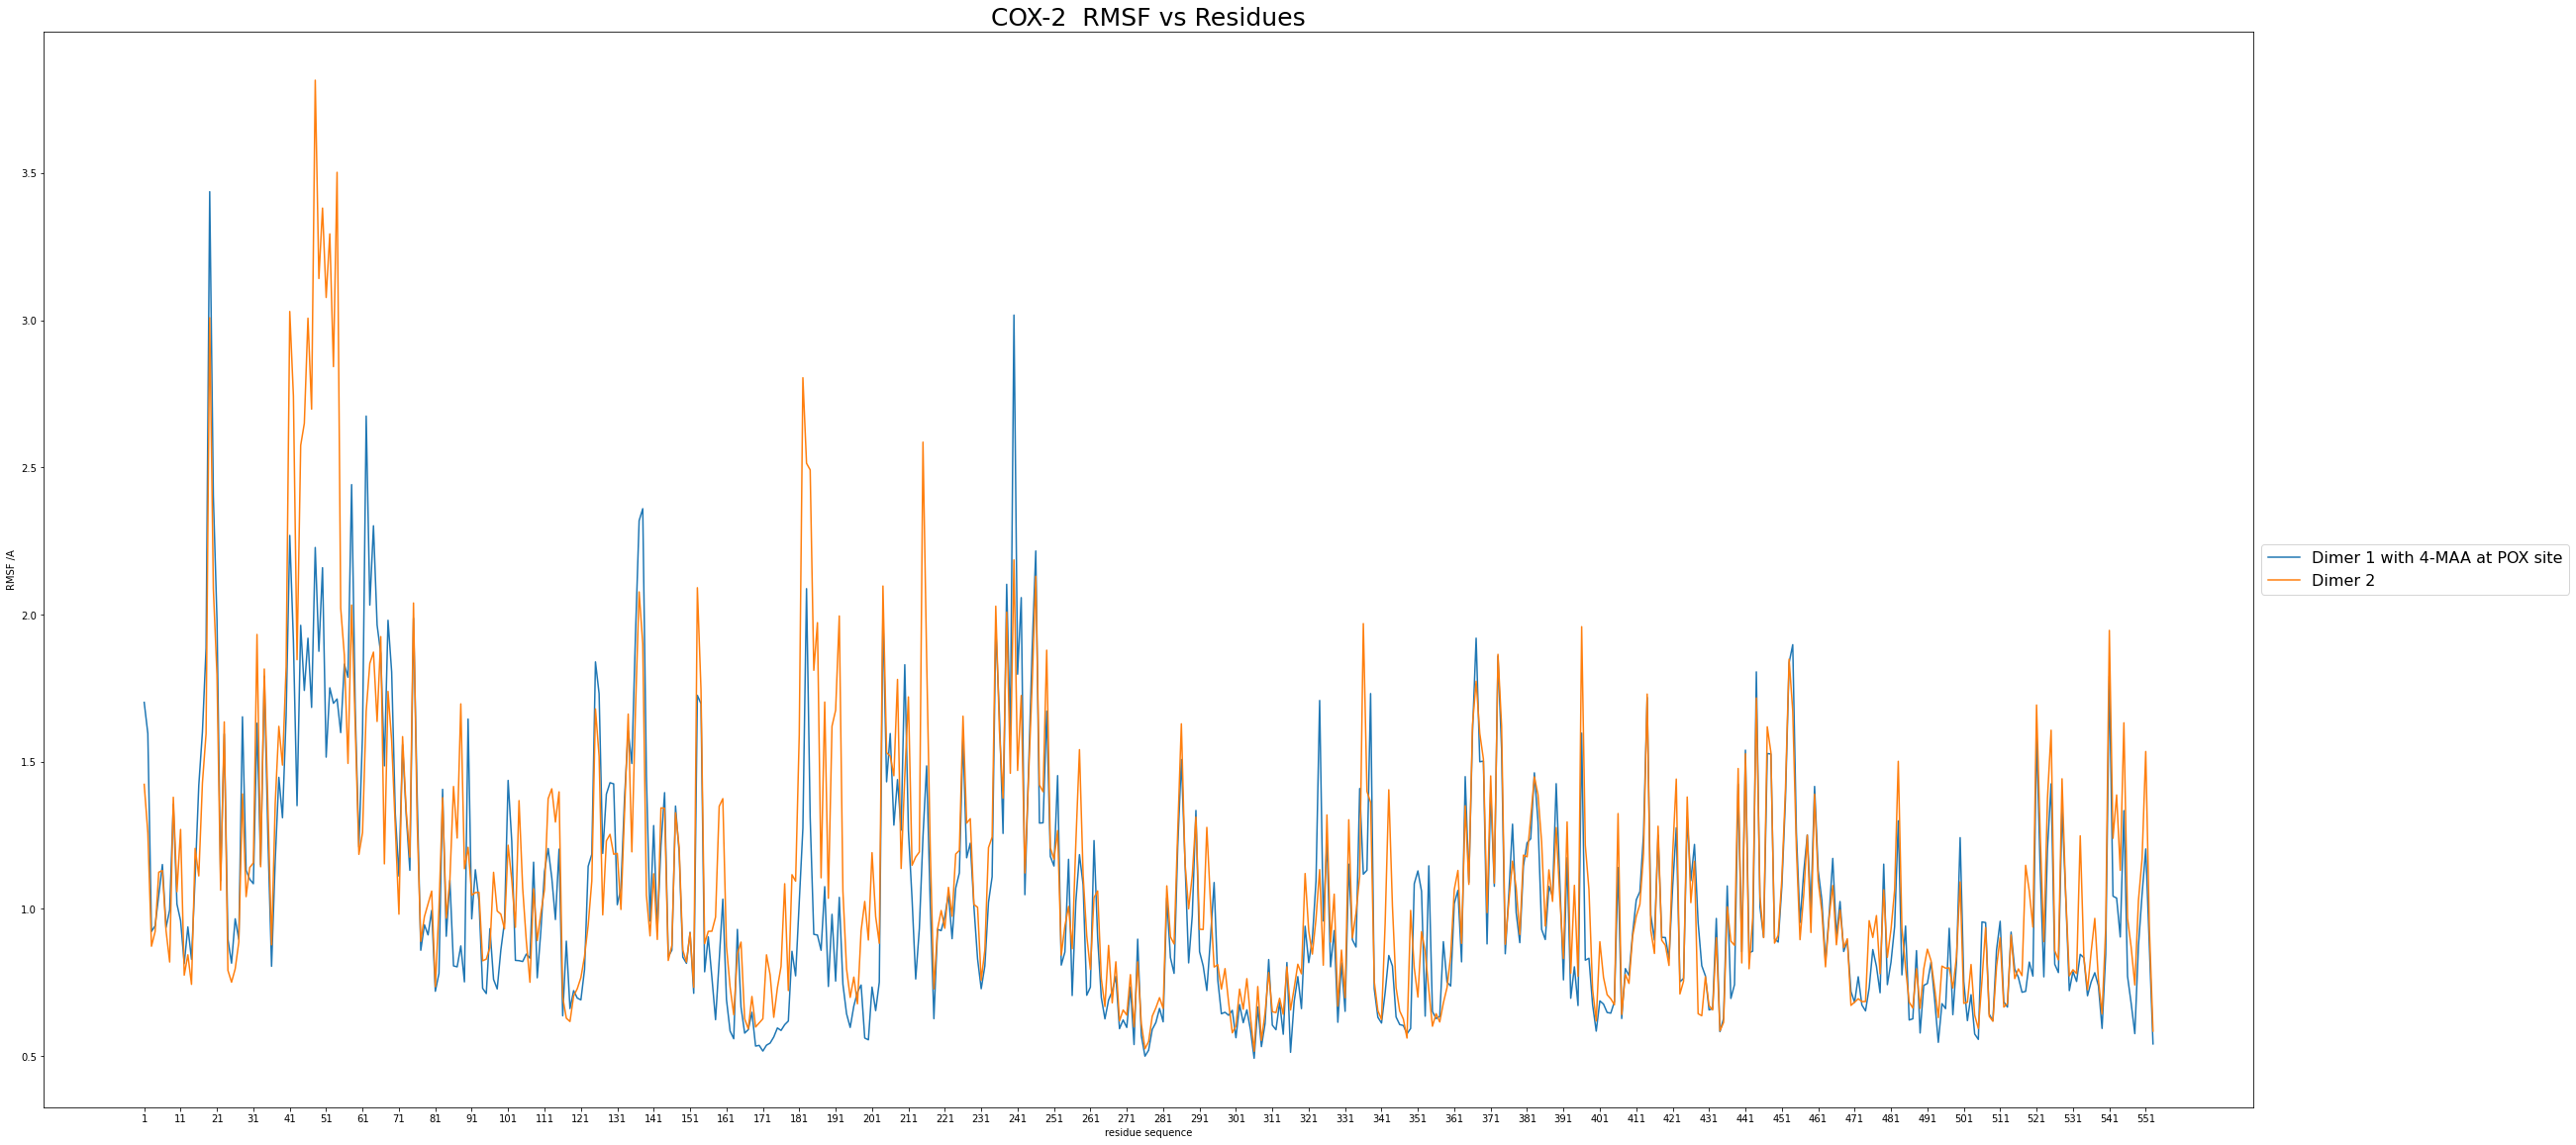

In [4]:
plt.figure(figsize = (40,20))
res_seq=np.array(range(1,554))
plt.plot(res_seq,Dimer_1.T[1],label= "Dimer 1 with 4-MAA at POX site")
plt.plot(res_seq,Dimer_2.T[1],label= "Dimer 2")
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation
plt.rcParams['font.size'] = '16'
plt.xticks(range(1,554,10))
plt.xlabel('residue sequence')
plt.ylabel('RMSF /A')
plt.title('COX-2  RMSF vs Residues', fontdict = {'fontsize' : 25})
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

[1.70171347 1.59594177 0.92342218 ... 1.5348839  0.93554004 0.58490191]


Text(0.5, 48.0, 'Number of residue')

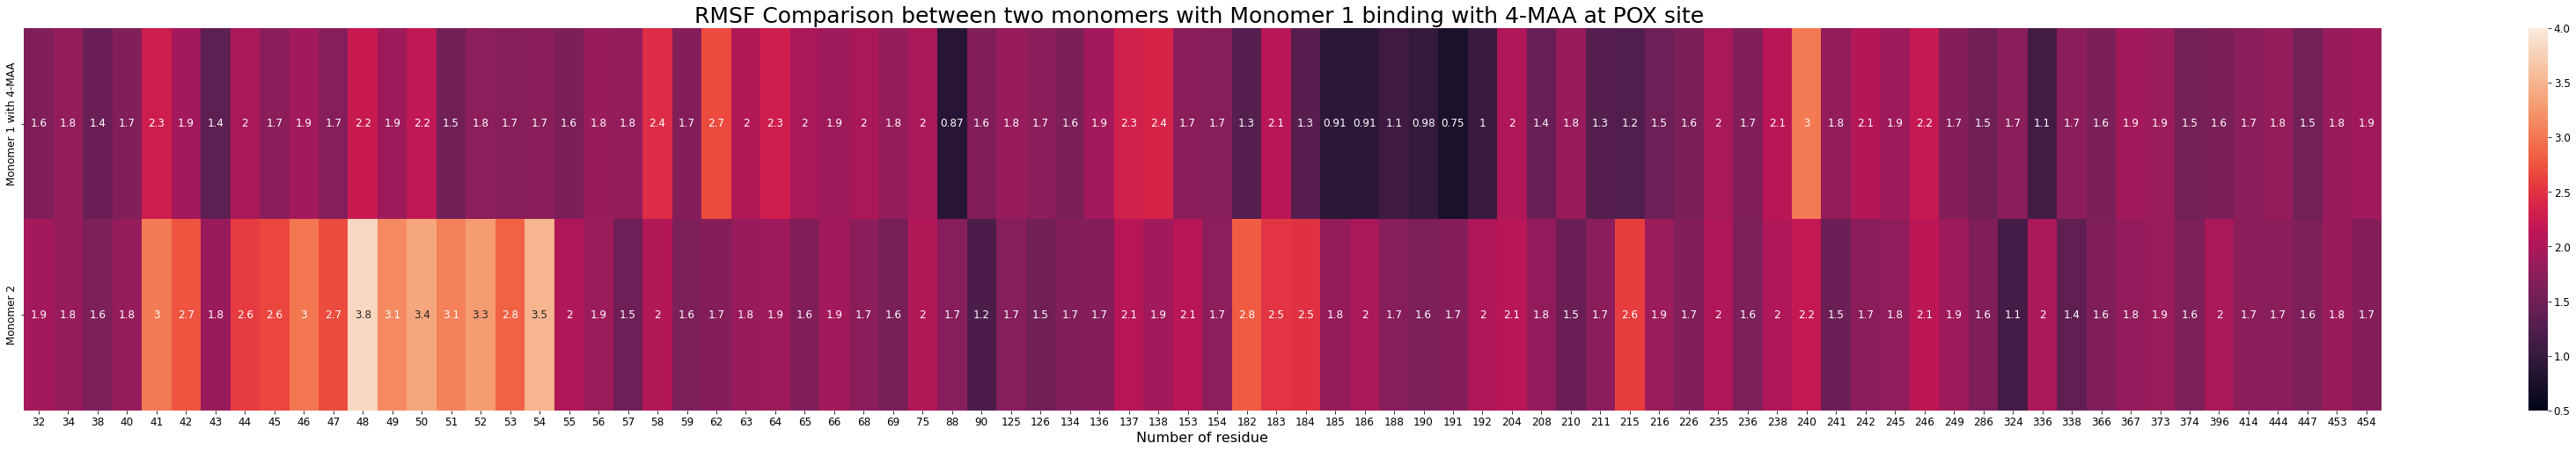

In [10]:
sub_name=['Monomer 1 with 4-MAA','Monomer 2',]
df = pd.DataFrame(index=sub_name)
res_seq=np.array(range(1,554))
#find the max value per column, per repeating subunit
max_rmsf=np.max(rmsf_stack,axis=0)
var_rmsf=np.var(rmsf_stack,axis=0)
print(max_rmsf)
df1 = df.copy()
for res in res_seq[(var_rmsf>=0)&(max_rmsf>1.6)]:
    if int(res) > 30 and int(res) < 520:
        df1[int(res)]=rmsf_stack[:,int(res)-1]
plt.figure(figsize = (60,8))
sns.heatmap(df1,annot=True,vmax=4,vmin=0.5)
plt.title('RMSF Comparison between two monomers with Monomer 1 binding with 4-MAA at POX site ', fontdict = {'fontsize' : 25})
plt.xlabel('Number of residue', fontdict = {'fontsize' : 16})

6000


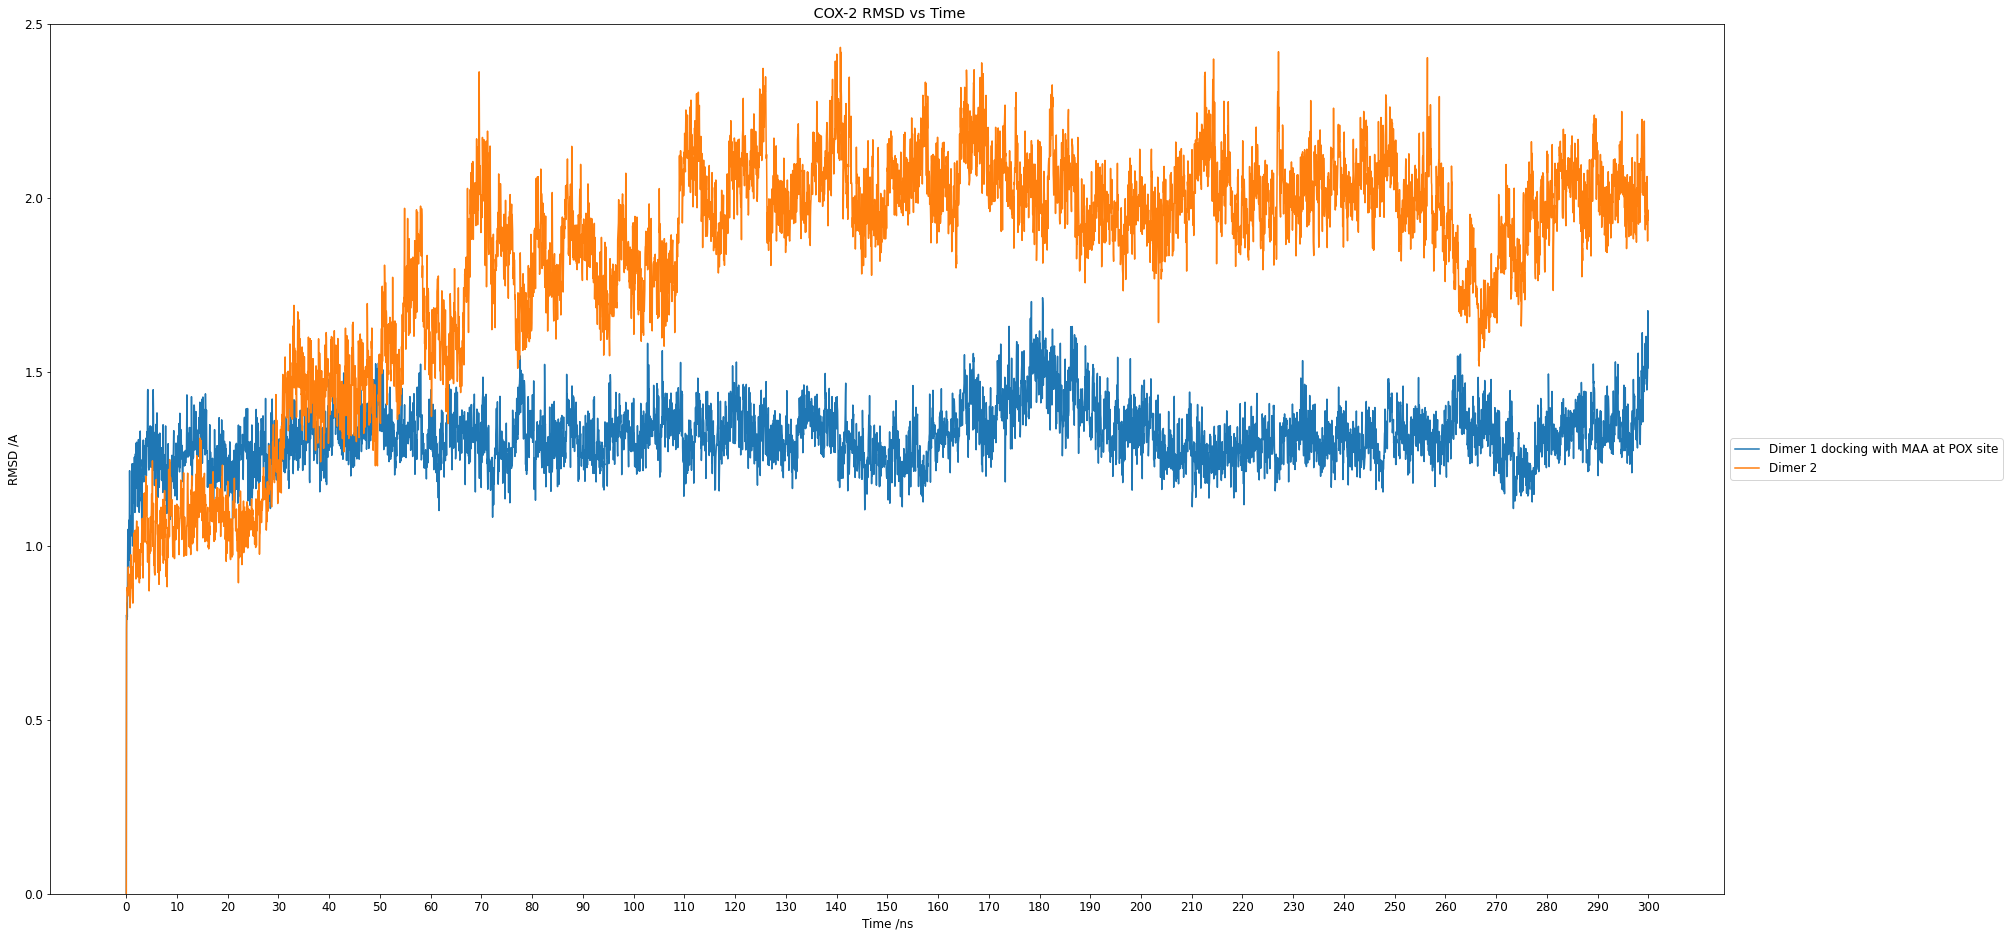

In [11]:
rmsd_dimer1 = pt.rmsd(traj,ref=0, mask=':2-554@CA')
rmsd_dimer2 = pt.rmsd(traj,ref=0, mask=':555-1109@CA')
md_time= list(np.arange(0,300,0.05))
print (len(md_time))
plt.figure(figsize = (30,16))
plt.rcParams['font.size'] = '12'
plt.plot(md_time,rmsd_dimer1,label= "Dimer 1 docking with MAA at POX site")
plt.plot(md_time,rmsd_dimer2,label= "Dimer 2")
plt.xticks(range(0,301,10))
plt.xlabel('Time /ns')
plt.ylabel('RMSD /A')
plt.ylim(0, 2.5)
plt.title(' COX-2 RMSD vs Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

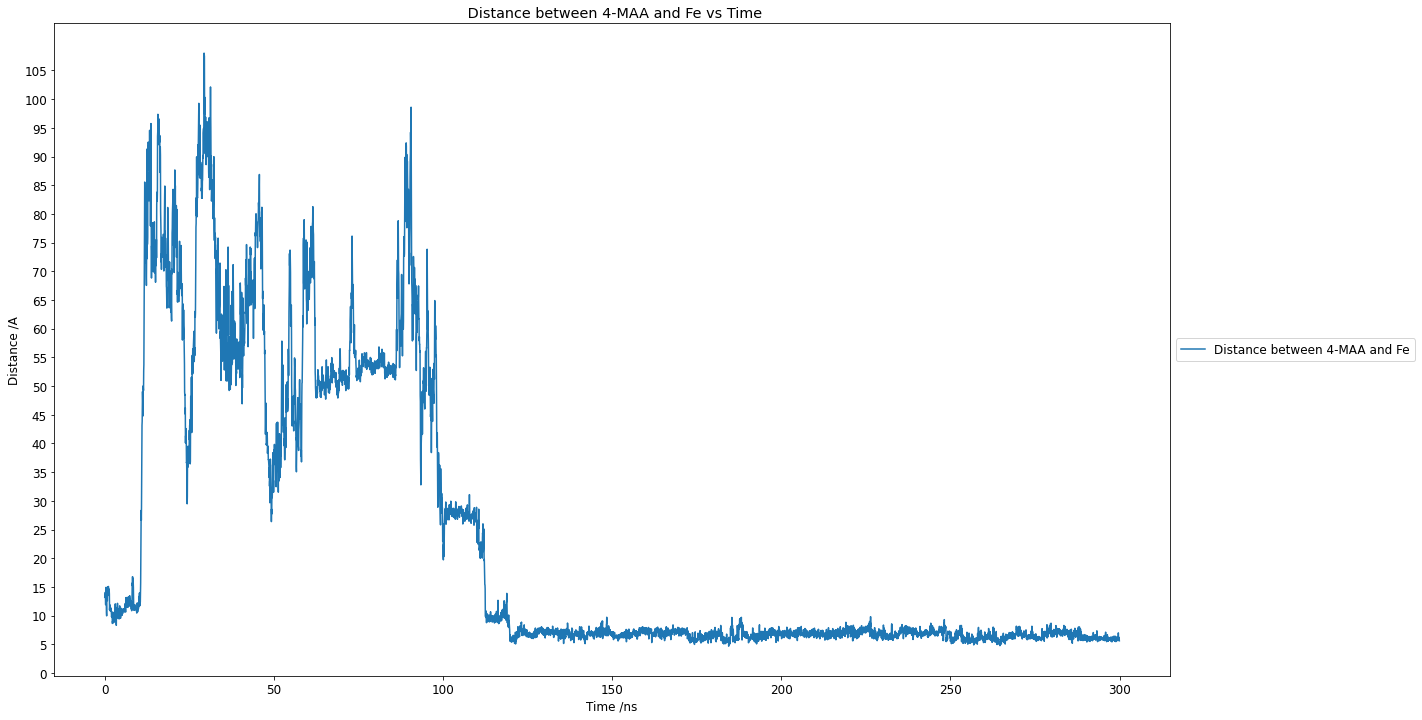

In [13]:
dist= pt.distance(traj,':1 :554')
plt.figure(figsize = (20,12))

plt.plot(md_time,dist,label= "Distance between 4-MAA and Fe")
plt.yticks(range(0,110,5))
plt.xlabel('Time /ns')
plt.ylabel('Distance /A')
plt.title(' Distance between 4-MAA and Fe vs Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))